In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
# Upload the archive
df_cholesterol = pd.read_csv('./datasets/dataset_cholesterol.csv')

In [166]:
# Check info
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [167]:
# Remove ID column
df_cholesterol.drop('Id', axis=1, inplace=True)

In [168]:
# Rename columns to remove spaces and make them lowercase
df_cholesterol.columns = [
    'blood_type',
    'smoker',
    'activity_level',
    'age',
    'weight',
    'height',
    'cholesterol'
]

In [169]:
# Copy DF to DF EDA
df_cholesterol_eda = df_cholesterol.copy()

In [170]:
# Copy DF to DF bucketing
df_cholesterol_bucketing = df_cholesterol.copy()

### EDA

In [171]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [172]:
df_cholesterol_eda.blood_type.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [173]:
# Detect missing values
df_cholesterol_eda.isnull().sum()

blood_type        4
smoker            3
activity_level    4
age               3
weight            3
height            3
cholesterol       0
dtype: int64

In [174]:
# Statistical summary of the data
df_cholesterol_eda.describe()

,age,weight,height,cholesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [175]:
# Colect categorical data
mode_blood_type = df_cholesterol_eda.blood_type.mode()
mode_smoker = df_cholesterol_eda.smoker.mode()
mode_activity_level = df_cholesterol_eda.activity_level.mode()

In [176]:
# Colect numerical data
median_age = df_cholesterol_eda.age.median()
median_weight = df_cholesterol_eda.weight.median()
median_height = df_cholesterol_eda.height.median()

In [177]:
# Input missing values
df_cholesterol_eda.fillna(value={
    'blood_type': mode_blood_type[0],
    'smoker': mode_smoker[0],
    'activity_level': mode_activity_level[0],
    'age': median_age,
    'weight': median_weight,
    'height': median_height
}, inplace=True)

In [178]:
# Convert age and weight to int
df_cholesterol_eda.age = df_cholesterol_eda.age.astype(int)
df_cholesterol_eda.height = df_cholesterol_eda.height.astype(int)

In [179]:
# Structure data
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   blood_type      1000 non-null   object 
 1   smoker          1000 non-null   object 
 2   activity_level  1000 non-null   object 
 3   age             1000 non-null   int32  
 4   weight          1000 non-null   float64
 5   height          1000 non-null   int32  
 6   cholesterol     1000 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 47.0+ KB


In [180]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='age'>

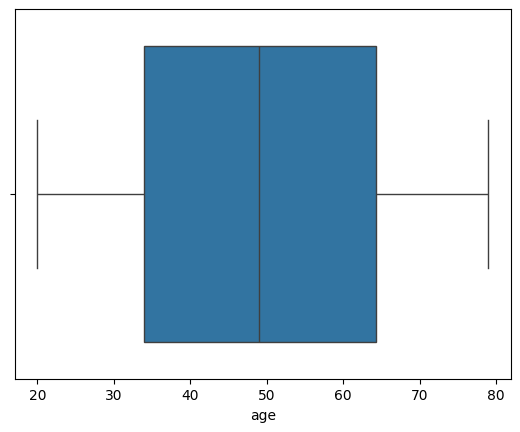

In [181]:
# Verify / detect outliers
sns.boxplot(data=df_cholesterol_eda, x='age')

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='weight'>

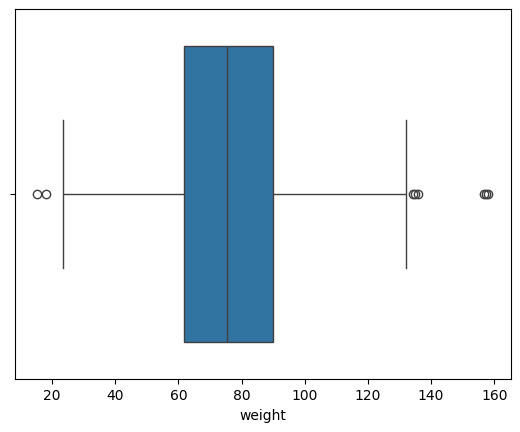

In [182]:
sns.boxplot(data=df_cholesterol_eda, x='weight')

In [183]:
# Filter public to remove outliers
df_cholesterol_eda[df_cholesterol_eda.weight < 40].count()

blood_type        37
smoker            37
activity_level    37
age               37
weight            37
height            37
cholesterol       37
dtype: int64

In [184]:
# Remove outliers
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda.weight < 40].index, axis=0, inplace=True)


c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='height'>

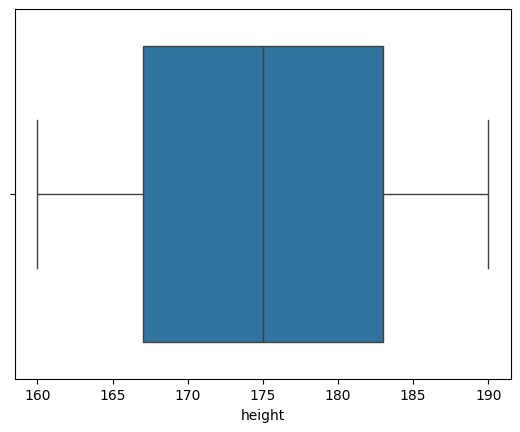

In [185]:
sns.boxplot(data=df_cholesterol_eda, x='height')

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='cholesterol'>

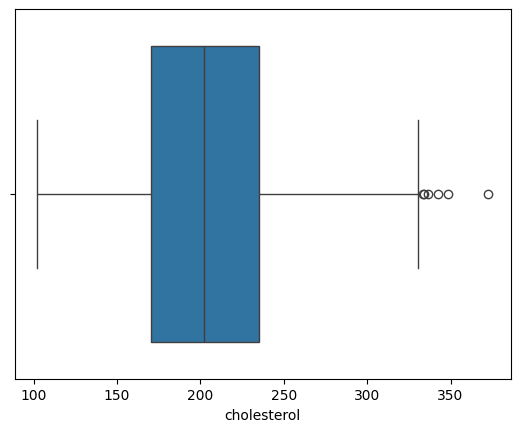

In [186]:
sns.boxplot(data=df_cholesterol_eda, x='cholesterol')

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='blood_type', ylabel='cholesterol'>

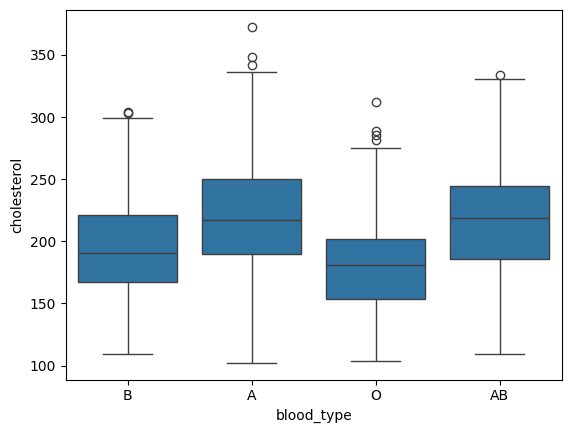

In [187]:
# Crossing categorical data with cholestero nivel
sns.boxplot(data=df_cholesterol_eda, x='blood_type', y='cholesterol')

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='smoker', ylabel='cholesterol'>

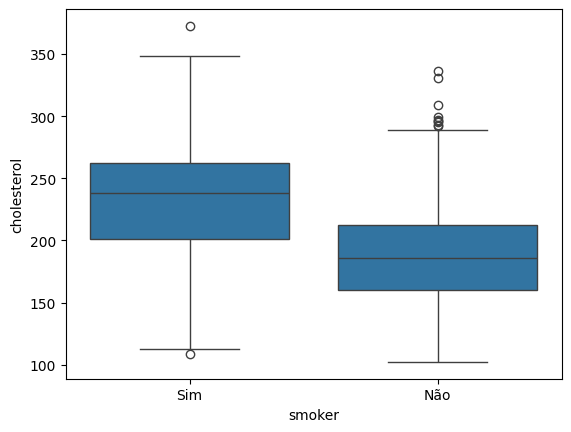

In [188]:
sns.boxplot(data=df_cholesterol_eda, x='smoker', y='cholesterol')

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='activity_level', ylabel='cholesterol'>

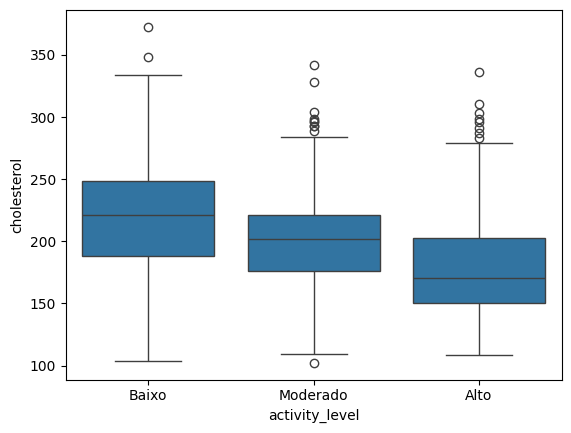

In [189]:
sns.boxplot(data=df_cholesterol_eda, x='activity_level', y='cholesterol')

<Axes: xlabel='age', ylabel='cholesterol'>

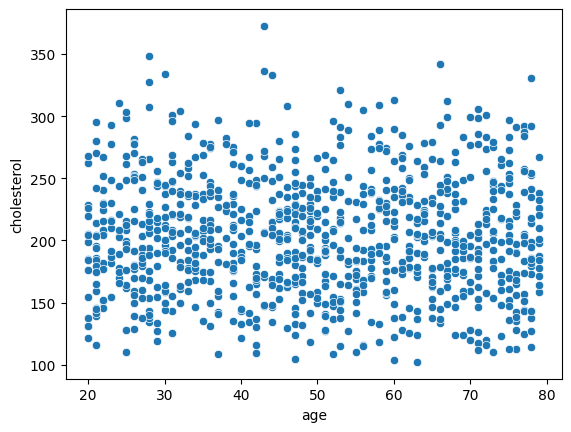

In [190]:
# Crossing numerics data with cholestero nivel
sns.scatterplot(data=df_cholesterol_eda, x='age', y='cholesterol')

<Axes: xlabel='weight', ylabel='cholesterol'>

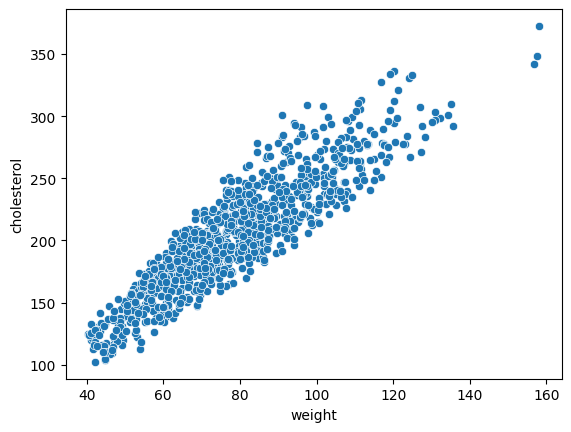

In [191]:
sns.scatterplot(data=df_cholesterol_eda, x='weight', y='cholesterol')

<Axes: xlabel='height', ylabel='cholesterol'>

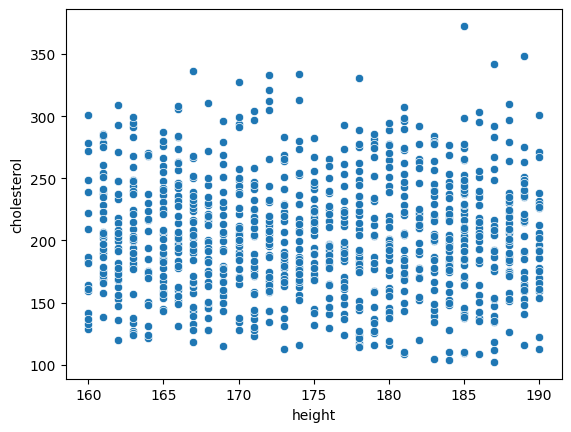

In [192]:
sns.scatterplot(data=df_cholesterol_eda, x='height', y='cholesterol')

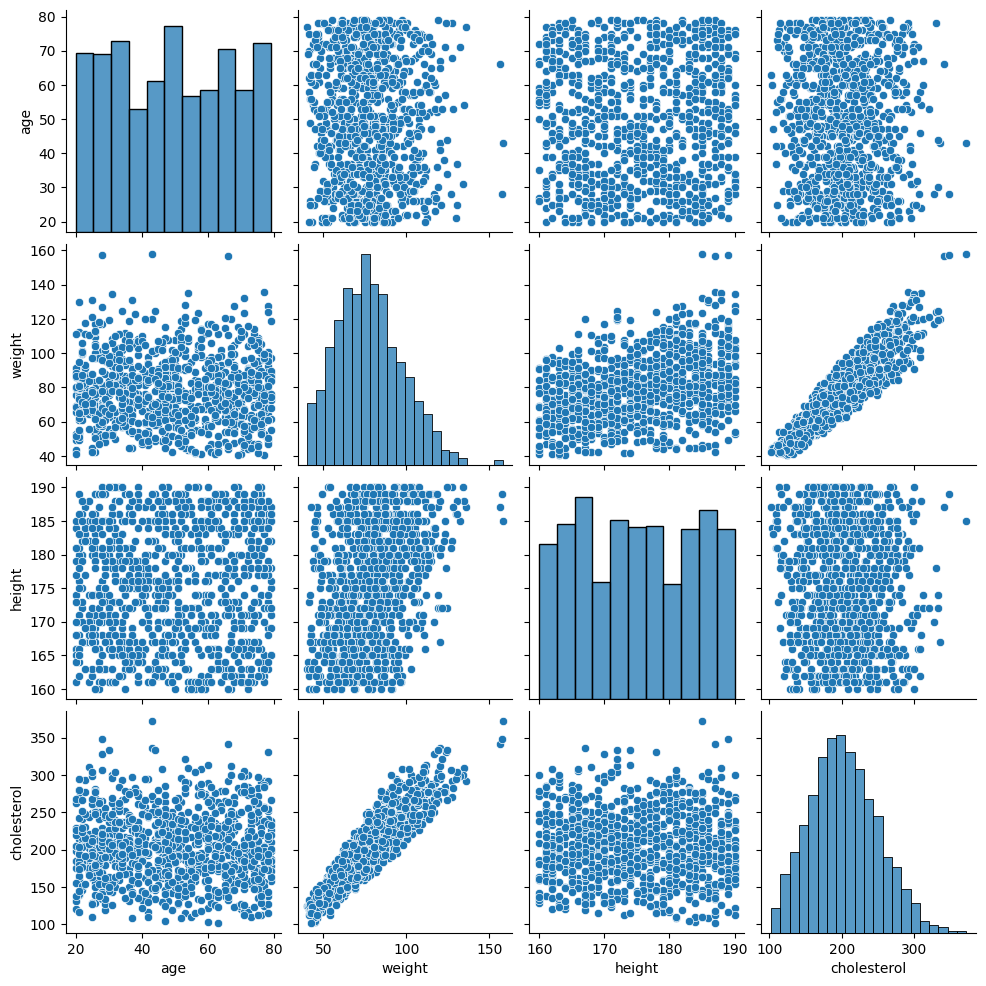

In [193]:
sns.pairplot(data=df_cholesterol_eda)

In [194]:
# Convert categorical data to numeric, using One Hot Encoding
df_cholesterol_eda = pd.get_dummies(df_cholesterol_eda, columns=['blood_type', 'smoker'], dtype='int64')

In [195]:
df_cholesterol_eda.head(10)

,activity_level,age,weight,height,cholesterol,blood_type_A,blood_type_AB,blood_type_B,blood_type_O,smoker_Não,smoker_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [196]:
# Convert categorical data to numeric, using Factorize (Label Encoding)
df_cholesterol_eda['activity_level'] = pd.factorize(df_cholesterol_eda.activity_level)[0] + 1

<Axes: >

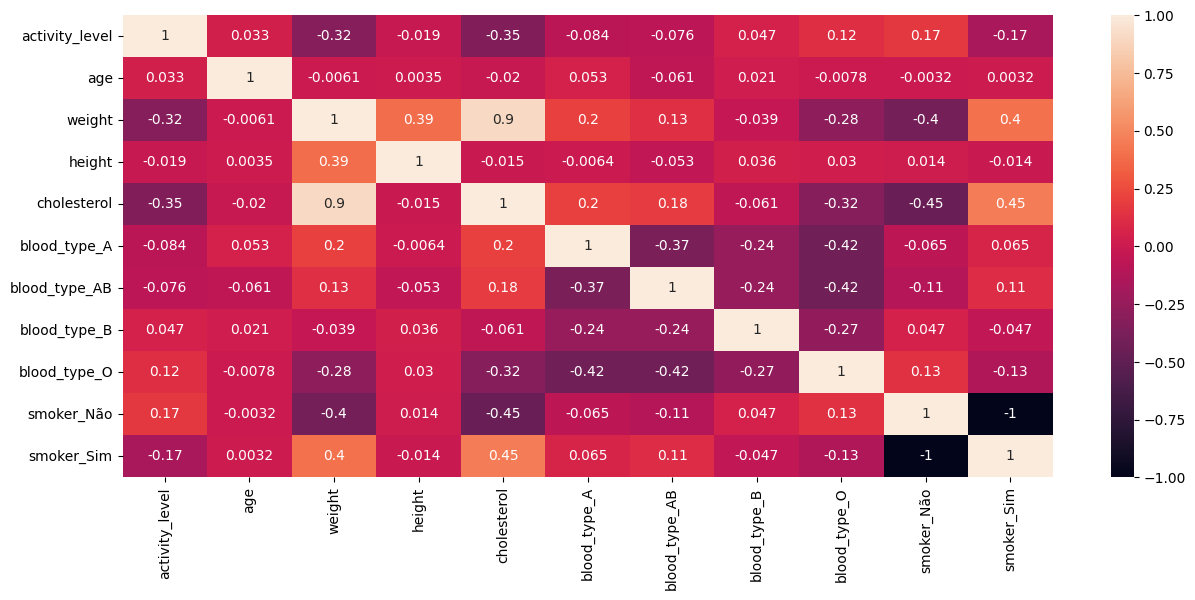

In [197]:
# Heatmap to check correlation between variables
plt.figure(figsize=(15, 6))
sns.heatmap(df_cholesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

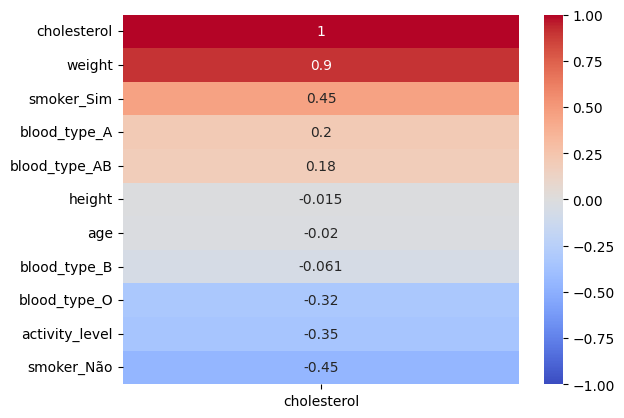

In [198]:
# Ranking format, some variables have correlation with target variable (cholesterol)
sns.heatmap(df_cholesterol_eda.corr()[['cholesterol']].sort_values(by='cholesterol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [199]:
# Bucketing
# 20 - 79 
bins_age = [20, 30, 40, 50, 60, 70, 80]
labels_age = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_cholesterol_bucketing['age_scale'] = pd.cut(df_cholesterol_bucketing.age, bins=bins_age, labels=labels_age, include_lowest=True)

In [200]:
df_cholesterol_bucketing.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol,age_scale
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='age_scale', ylabel='cholesterol'>

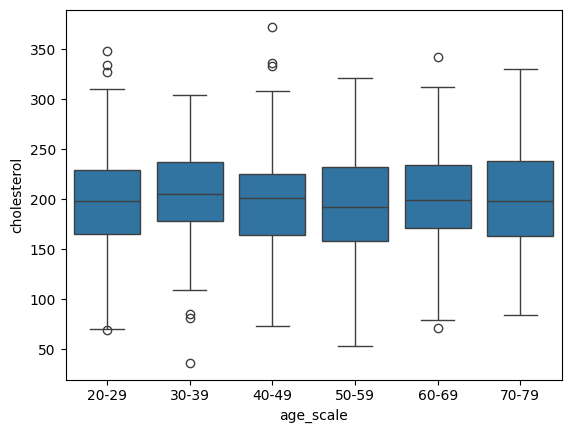

In [201]:
sns.boxplot(data=df_cholesterol_bucketing, x='age_scale', y='cholesterol')

In [202]:
# Bucketing - Weight
bins_age = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_age = ['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159']
df_cholesterol_bucketing['weight_scale'] = pd.cut(df_cholesterol_bucketing.weight, bins=bins_age, labels=labels_age, include_lowest=True)

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='weight_scale', ylabel='cholesterol'>

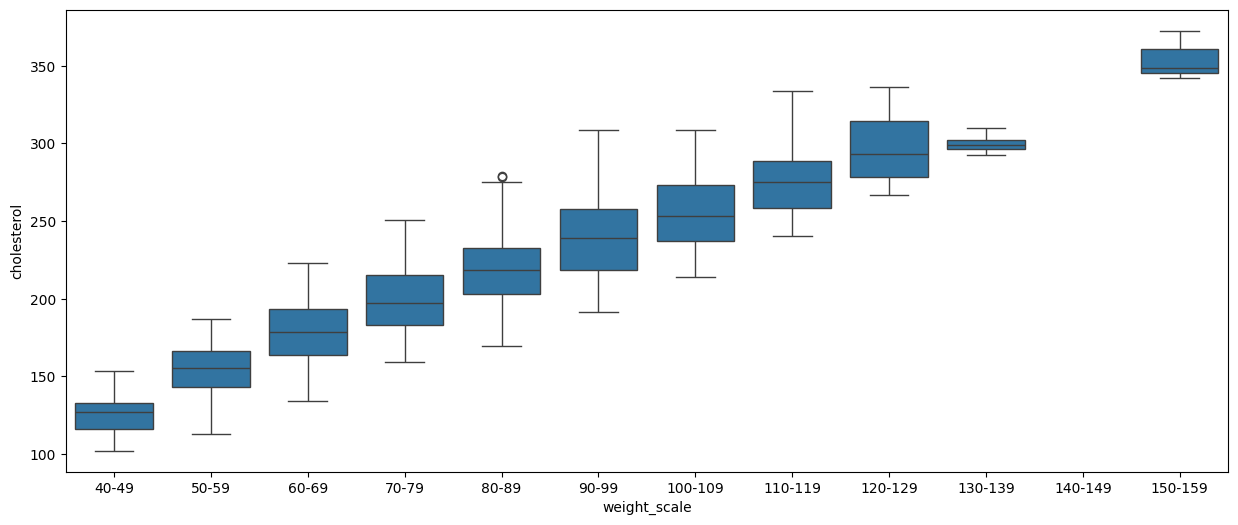

In [203]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cholesterol_bucketing, x='weight_scale', y='cholesterol')

### Training Model

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [205]:
# Create Training and Test datasets
df_cholesterol.drop(df_cholesterol[df_cholesterol.weight < 40].index, axis=0, inplace=True)

In [206]:
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   blood_type      960 non-null    object 
 1   smoker          960 non-null    object 
 2   activity_level  959 non-null    object 
 3   age             960 non-null    float64
 4   weight          960 non-null    float64
 5   height          960 non-null    float64
 6   cholesterol     963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [207]:
X = df_cholesterol.drop('cholesterol', axis=1)
y = df_cholesterol.cholesterol

In [208]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [209]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (674, 6), y_train: (674,), X_test: (289, 6), y_test: (289,)


In [210]:
# Pipeline
# Input mode in categorical data - blood_type, smoker, activity_level
# Standard numeric data - age, weight, height
# OneHotEncode in nominal data - blood_type, smoker
# OrdinalEncode in ordinal data - activity_level
# Imputar median in numeric data - age, weight, height

# Name columns
categorical_columns = ['blood_type', 'smoker']
numeric_columns = ['age', 'height', 'weight']
ordinal_columns = ['activity_level']


In [211]:
# Transform Catetorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [212]:
# Transform Ordinal data
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
])

In [213]:
# Trasnform Numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [214]:
# Create a ColumnTransformer to apply all transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns),
    ('ord', ordinal_transformer, ordinal_columns)
])

In [215]:
# Create a Pipeline to apply the model
model_regr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [216]:
# Train the model
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['blood_type', 'smoker']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['activity_level'])])),
                ('regressor', LinearRegression())])

### Metrics Analysis

In [217]:
# Predict General
y_pred = model_regr.predict(X_test)

In [218]:
# Calculate R2 Score
r2_score(y_test, y_pred)

0.9594250724093464

In [219]:
# Calculate MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

7.313838031022505

In [223]:
# Caculate RMSE (Root Mean Squared Error)
mean_squared_error(y_test, y_pred, squared=False)

c:\Users\ranie\.virtualenvs\multiple_linear_regression-gn4KghFK\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.097649246487032

### Residuals Analysis

In [224]:
# Calculate Residuals
residuals = y_test - y_pred

In [226]:
# Transform residual to standard normal distribution
# (X - mean) / std
from scipy.stats import zscore
residuals_std = zscore(residuals)

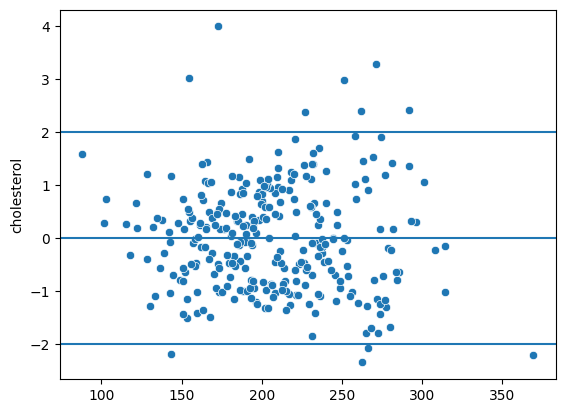

In [228]:
# Verify linearity of residuals (Values between -2 and 2)
# Verify homoscedasticity of residuals (Values in a straight line)
sns.scatterplot(x=y_pred, y=residuals_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

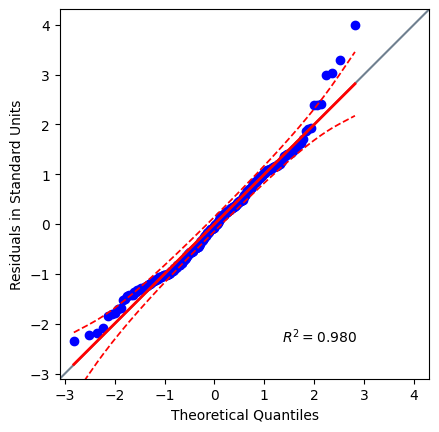

In [233]:
# Check if residuals are normally distributed
# QQ Plot
import pingouin as pg
pg.qqplot(residuals, dist='norm', confidence=0.95)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals in Standard Units')
plt.show()

In [235]:
# Normality test - Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

stat_shapiro, p_value_shapiro = shapiro(residuals)
print(f'Statistic: {stat_shapiro}, p-value: {p_value_shapiro}')

Statistic: 0.9807737729720736, p-value: 0.0006268860444491616


In [236]:
# Normality test - Kolmogorov-Smirnov
stat_kstest, p_value_kstest = kstest(residuals, 'norm')
print(f'Statistic: {stat_kstest}, p-value: {p_value_kstest}')

Statistic: 0.42455920998485785, p-value: 8.92583319090192e-48


In [239]:
# Normality test - Lilliefors
stat_lilliefors, p_value_lilliefors = lilliefors(residuals, dist='norm', pvalmethod='table')
print(f'Statistic: {stat_lilliefors}, p-value: {p_value_lilliefors}')

Statistic: 0.0495537103019284, p-value: 0.12533323720737444


In [237]:
# Normality test - Anderson-Darling
result_anderson = anderson(residuals)
print(f'Statistic: {result_anderson.statistic}, p-value: {result_anderson.critical_values}')

Statistic: 0.9169275158490109, p-value: [0.568 0.647 0.776 0.906 1.077]


In [240]:
# Homoscedasticity test - Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)


In [241]:
X_test_transformed.shape

(289, 10)

In [245]:
test_goldfeldquandt = het_goldfeldquandt(residuals, X_test_transformed)
stat_goldfeld = test_goldfeldquandt[0]
p_value_goldfeld = test_goldfeldquandt[1]

print(f'Statistic: {stat_goldfeld}, p-value: {p_value_goldfeld}')

Statistic: 0.6716135765253546, p-value: 0.9893959472385483


### Individual Predictions

In [248]:
individual_prediction = {
    'blood_type': 'O',
    'smoker': 'Não',
    'activity_level': 'Alto',
    'age': 40,
    'weight': 70,
    'height': 180
}

sample_df = pd.DataFrame(individual_prediction, index=[0])

In [249]:
sample_df

,blood_type,smoker,activity_level,age,weight,height
0,O,Não,Alto,40,70,180


In [250]:
# Predict
model_regr.predict(sample_df)

array([165.32375099])

In [251]:
import joblib as jb

In [252]:
# Save model
jb.dump(model_regr, './cholesterol_model.pkl')

['./cholesterol_model.pkl']